In [1]:
import networkx as nx
import graphviz as gv
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/jperera.GRUPOPLENUM/Documents/Software/release/bin'

In [2]:
G = nx.Graph()

F = ['AC', 'AC2', 'AM', 'AT', 'AX', 'BR', 'CG', 'CH', 'DG', 'DL',\
     'DN', 'EC', 'EC2', 'EC3', 'EP', 'EV', 'FV', 'GA', 'GK', 'GP',\
     'IL', 'JC', 'JL', 'JM', 'JN', 'JV', 'KM', 'KM2', 'LL', 'LM',\
     'LP', 'LR', 'LU', 'MC', 'MC2', 'ML', 'MM', 'MT', 'MZ', 'OC',\
     'OP', 'PC', 'RA', 'RC', 'RG', 'RJ', 'SE', 'SO', 'VA', 'YB',\
     'ZB']

R = {}

R['AC'] = ['AM', 'AT', 'RA', 'AX', 'BR', 'DL', 'DN', 'DG', 'EC3', 'EP',\
      'GA', 'JN', 'JV', 'KM', 'KM2', 'LR', 'LL', 'LM', 'ML', 'MC',\
      'MT', 'MC2', 'OC', 'RC', 'RJ', 'RG']

R['AC2'] = ['AT', 'LL', 'LM', 'MC', 'MT', 'RJ', 'RG']

R['AM'] = ['RA', 'DG', 'EC', 'EC3', 'JV', 'KM', 'LL', 'ML', 'MC2', 'PC']

R['AT'] = ['JC', 'DN', 'JN', 'KM2', 'LM', 'MC', 'MT', 'RG']

R['AX'] = ['EP', 'GA', 'LR', 'MT', 'RC', 'SO']

R['BR'] = ['MC2']

R['CG'] = ['DL', 'LU', 'OC']

R['CH'] = ['RA', 'MC2']

R['DG'] = ['JV', 'LL', 'ML', 'MT']

R['DL'] = ['OC', 'LU', 'SE', 'ZB']

R['DN'] = ['JN', 'KM2', 'LM', 'MC', 'RJ', 'RG']

R['EC'] = ['EC3', 'ML', 'MC2']

R['EC2'] = ['GK', 'JN', 'JV', 'LM']

R['EC3'] = ['RA', 'EV', 'IL', 'JV', 'ML', 'MC2', 'PC']

R['EP'] = ['GA', 'LR', 'ML', 'MT', 'RC', 'VA']

#R['EV'] = []

R['FV'] = ['LP', 'OP']

R['GA'] = ['JL', 'LR', 'MT', 'RC']

R['GK'] = ['JC', 'KM', 'SO', 'VA']

R['GP'] = ['LU', 'OC']

R['IL'] = ['ML', 'MC2', 'PC']

R['JC'] = ['JL', 'LM', 'MT', 'MM']

R['JL'] = ['MM', 'RC']

R['JM'] = ['JN', 'LM', 'MC']

R['JN'] = ['LL', 'LM', 'MC', 'MT', 'RJ']

R['JV'] = ['LL', 'MC2']

R['KM'] = ['MT', 'SO', 'VA', 'YB']

R['KM2'] = ['LM', 'MC']

R['LL'] = ['RA', 'LM', 'ML', 'MC', 'MT', 'MC2', 'PC', 'RG']

R['LM'] = ['MC', 'MT', 'MM', 'RJ', 'RG']

R['LP'] = ['VA']

R['LR'] = ['MT', 'RC']

R['LU'] = ['SE', 'MZ', 'OC']

R['MC'] = ['MT', 'RJ', 'RG']

R['MC2'] = ['RA', 'PC']

R['ML'] = ['RA']

#R['MM'] = []
#R['MT'] = []

R['MZ'] = ['OC']

R['OC'] = ['SE', 'ZB']

#R['OP'] = []
#R['PC'] = []
#R['RA'] = []
#R['RC'] = []
#R['RG'] = []
#R['RJ'] = []
#R['SE'] = []

R['SO'] = ['VA', 'YB']

R['VA'] = ['YB']

#R['YB'] = []
#R['ZB'] = []

R['JR'] = ['AC', 'AT', 'DN', 'JN', 'JM', 'LM', 'MC', 'RJ']

R['AT2'] = ['MT', 'LL']

#R['MB'] = ['AC', 'MC2', 'EC2']

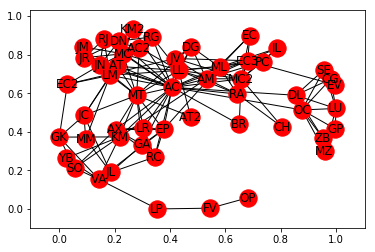

'Grafo_Completo.png'

In [3]:
G = nx.from_dict_of_lists(R)
nx.draw_networkx(G)
plt.show()
all_edges = G.edges()
complete = gv.Graph(format='png')
complete.edges(all_edges)
complete.render('Grafo_Completo')

**Facebook and Beer friendship, grafo completo**
![this is the alt-attribute](Grafo_Completo.png)

In [4]:
between_clusters = []
def Girvan_Newman(G):
      len_min_cc = len(min(nx.connected_components(G), key=len))
      while len_min_cc > 1:
         ebc = nx.edge_betweenness_centrality(G)
         ebc = sorted(ebc.items(), key=lambda x:x[1], reverse = True)
         between_clusters.append((ebc[0][0][0], ebc[0][0][1]))
         G.remove_edge(ebc[0][0][0], ebc[0][0][1])
         CC = nx.connected_components(G)
         len_min_cc = len(min(CC, key=len))
      G.add_edge(ebc[0][0][0], ebc[0][0][1])
      return G

Gnx = Girvan_Newman(G)
CC = list(nx.connected_components(Gnx))
cluster_names = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']
cluster_labels = ['Olimpiada', 'Trabajo', 'CDMX', 'Secundaria', 'Prepa', '#PorquePuedo']
colors_attr = ['lightblue1', 'lightcoral', 'mediumspringgreen', 'mediumorchid1', 'sienna1', 'khaki1', 'purple1']

Ggv = gv.Graph(format='png')
for cc in CC:
   Ggv.attr('node', color = colors_attr[0], style = 'filled')
   with Ggv.subgraph(name = cluster_names.pop(0)) as subG:
      subG.attr(label = cluster_labels.pop(0), color = colors_attr.pop(0))
      aux = nx.subgraph(G, list(cc))
      subG.edges(aux.edges())

Ggv.render('Facebook_&_Beer_clusters')
Ggv.edges(between_clusters)
Ggv.render('Facebook_&_Beer_intraclusters')

'Facebook_&_Beer_intraclusters.png'

**Facebook and Beer friendship, clusters**
![this is the alt-attribute](Facebook_&_Beer_clusters.png)
**Facebook and Beer friendship, intraclusters**
![this is the alt-attribute](Facebook_&_Beer_intraclusters.png)

In [6]:
import pandas as pd, numpy as np
from sklearn import datasets
from sklearn.metrics import pairwise_distances as pair_d
from sklearn.preprocessing import scale
from scipy.stats import describe

In [11]:
iris_data = datasets.load_iris(return_X_y = True)
#d = np.vstack((iris_data[0].T, iris_data[1]))
#iris_df = pd.DataFrame(d.T)
iris_df = pd.DataFrame(iris_data[0])
#iris_df.describe()
iris_scaled = scale(iris_df)
M = pair_d(iris_scaled, metric = 'euclidean')
#M = pair_d(iris_df, metric = 'euclidean')
D = describe(M)
print(D.mean[0], D.variance[0])
alphas = D.mean - 0.6*D.variance
print(alphas)

2.69839957509 2.13214225007
[ 1.41911423  1.56564368  1.42751603  1.51620255  1.49325925  1.97911097
  1.48969039  1.36996268  1.8280511   1.47188272  1.70579549  1.39895155
  1.58185166  1.81619382  2.34081606  2.97911126  1.98037621  1.42432977
  2.00355642  1.74055546  1.55995016  1.63528666  1.65527728  1.49114666
  1.44834088  1.58284988  1.41557576  1.45339623  1.4283591   1.42949757
  1.46324319  1.56970398  2.28484087  2.52102645  1.47188272  1.4358404
  1.64956013  1.47188272  1.71824879  1.38832478  1.41923129  2.62603162
  1.5945225   1.57421731  1.80002019  1.57205761  1.74484476  1.46235894
  1.65700077  1.37880614  1.63569669  1.43559849  1.40295512  1.75847244
  1.19474713  1.33227201  1.5223255   2.01899694  1.33464672  1.63613313
  2.48879257  1.33578164  1.95429783  1.19973944  1.50789478  1.45060236
  1.4339433   1.48567743  1.7636662   1.57166253  1.4714982   1.33008174
  1.33327611  1.30090226  1.32265314  1.34467395  1.34474137  1.15919363
  1.20161759  1.60321688

C:\Users\jperera.GRUPOPLENUM\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jperera.GRUPOPLENUM\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jperera.GRUPOPLENUM\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jperera.GRUPOPLENUM\AppData\Local\Continuum\Anaconda3\lib\site-packa

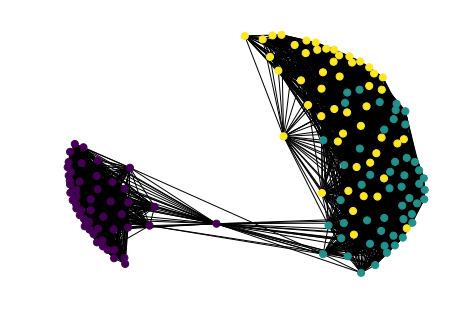

In [12]:
def adj_lst_from_umbral(A, alpha):
    adj_lst = {}
    for i in range(len(A)):
        aux = np.where(A[i] < alpha[i])[0].tolist()
        aux.remove(i)
        adj_lst[i] = aux
    return adj_lst

ADJ_L = adj_lst_from_umbral(M, alphas)
G = nx.Graph()
G = nx.from_dict_of_lists(ADJ_L)
pos_aux = nx.spring_layout(G, k = 0.2, scale = 3)
colors = 50*[1] + 50*[2] + 50*[3]
nx.draw(G, pos = pos_aux, with_labels = False, node_size = 50, node_color = colors)
plt.show()